# Learning a complicated function with a simple neural network

The purpose of this notebook is to implement a deep neural network using Keras to learn a complicated function (function interpolation)

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data using a complecated funciton

In [2]:
def some_complicated_function(x):  # definition of a complecated funciton
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

##### Simulation of train data

In [3]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.randn(xtrain.shape[0])  # train data includes some noise

In [4]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 10000)


##### Simulation of test data

In [5]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [6]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


##### Plot of the function we want to interpolate

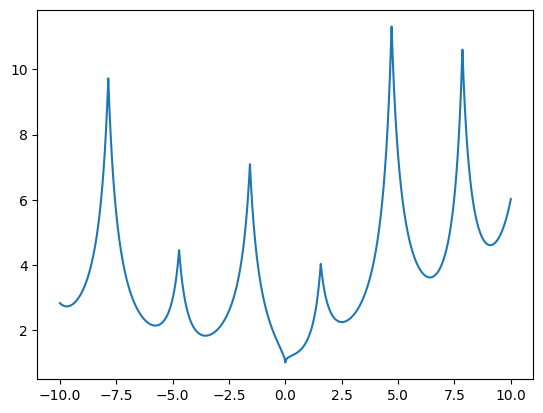

In [7]:
plt.plot(xtest, ytest)

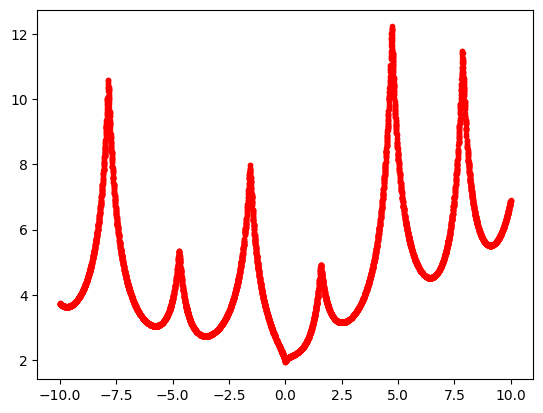

In [8]:
for i in range(N_test):
    plt.plot(xtrain[i][0], ytrain[i][0], '.r')

### Model definition

**TASK 1**: In the code below try to set values for relevant hyperparameters, such as the number of nodes, the number of layers, and choose an activation function. Also, using the module **keras.regularizers** try to set parameter norm penalties or add a dropout layer via **layers.Dropout(fraction)** for regularizing your model.

In [9]:
nb_nodes = 1
nb_layers = 3
activation = "relu" # insert your choice of actiation funciton
reg_strategy = keras.regularizers.l1_l2(l1=0.01, l2=0.01) # define your regularization strategy - use L1 and L2 regularization

model = keras.models.Sequential(name="1Dfit")
# Input Layer: Defines the input shape based on the features in xtrain.
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy, input_dim=xtrain.shape[1]))  # first layer

# Hidden Layers: Loop to add multiple hidden layers with the same configuration.
for layer in range(nb_layers - 1):
    model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy))


# Output Layer: Configured for regression with a single output node. => regression problem (1 node)
model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

**TASK 2**: Complete the code below by choosing an objective (loss) function for this regression task and optimization method from **keras.optimizers**

In [10]:
adam = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(loss = "MeanSquaredError", optimizer = adam)

##### The model is created using SVM algorithm . The resultin3g accuracy is relatef to the question at hand!

### Train the model

**TASK 3**: Complete the code below and train the network for a couple of epochs and save the model several times in between

In [11]:
epochs = 200
save_period = 40   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/200
157/157 [==============================] - 0s 2ms/step - loss: 18.5661
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 17.4367
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 16.3773
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 15.3848
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 14.4571
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 13.5891
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 12.7782
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 12.0216
Epoch 9/200
157/157 [==============================] - 0s 2ms/step - loss: 11.3181
Epoch 10/200
157/157 [==============================] - 0s 2ms/step - loss: 10.6632
Epoch 11/200
157/157 [==============================] - 0s 2ms/step - loss: 10.0554
Epoch 12/200
157/157 [==============================] - 0s 2ms/step - loss: 9.2404
Ep

Compare the performance of the model during the training. You may use the skeleton below:

313/313 [==============================] - 0s 262us/step


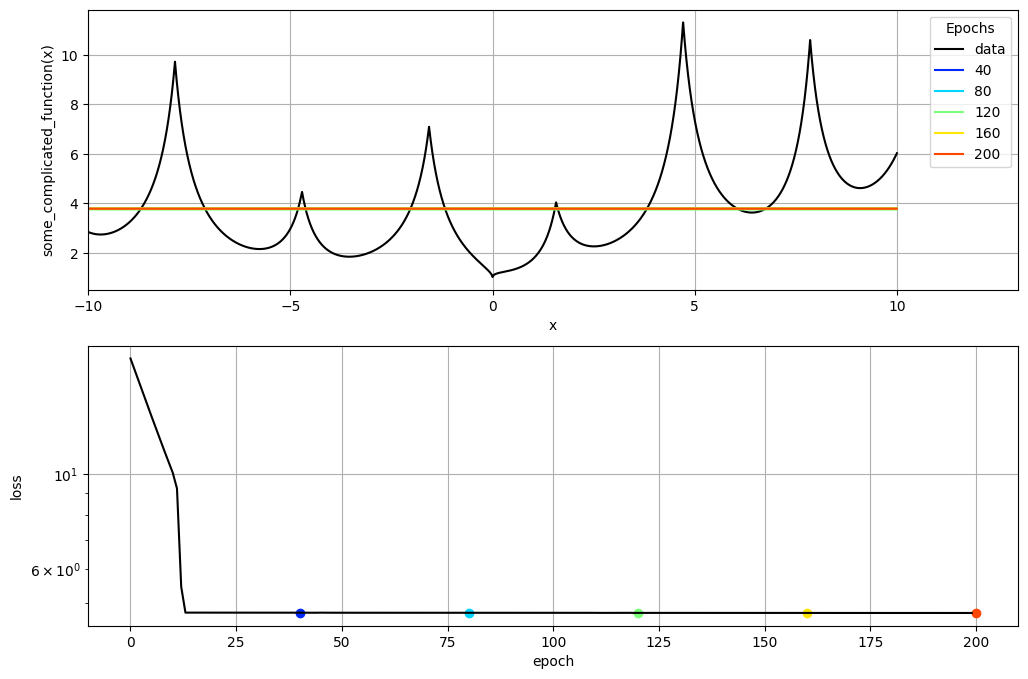

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

In [13]:
nb_nodes = 50
nb_layers = 3
activation = "relu" # insert your choice of actiation funciton
reg_strategy = keras.regularizers.l1_l2(l1=0.01, l2=0.01) # define your regularization strategy - use L1 and L2 regularization

model2 = keras.models.Sequential(name="1Dfit")
# Input Layer: Defines the input shape based on the features in xtrain.
model2.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy, input_dim=xtrain.shape[1]))  # first layer

# Hidden Layers: Loop to add multiple hidden layers with the same configuration.
for layer in range(nb_layers - 1):
    model2.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy))


# Output Layer: Configured for regression with a single output node. => regression problem (1 node)
model2.add(layers.Dense(1))  # final layer

print(model2.summary())

model2.compile(loss = "MeanSquaredError", optimizer = adam)

epochs = 200
save_period = 40   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-new-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model2.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                100       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5251 (20.51 KB)
Trainable params: 5251 (20.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
157/157 [==============================] - 1s 2ms/step - loss: 7.2666
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - los

313/313 [==============================] - 0s 251us/step


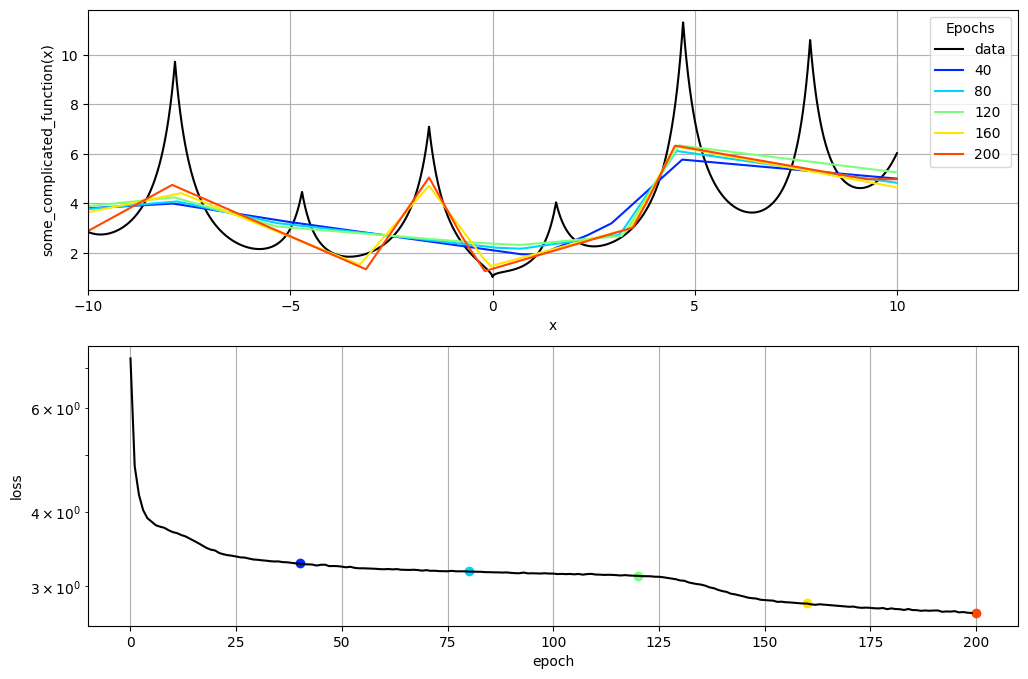

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model2.load_weights("weights-new-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model2.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

In [17]:
nb_nodes = 100
nb_layers = 2
activation = "relu" # insert your choice of actiation funciton
reg_strategy = keras.regularizers.l1_l2(l1=0.01, l2=0.01) # define your regularization strategy - use L1 and L2 regularization

model3 = keras.models.Sequential(name="1Dfit")
# Input Layer: Defines the input shape based on the features in xtrain.
model3.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy, input_dim=xtrain.shape[1]))  # first layer

# Hidden Layers: Loop to add multiple hidden layers with the same configuration.
for layer in range(nb_layers - 1):
    model3.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy))


# Output Layer: Configured for regression with a single output node. => regression problem (1 node)
model3.add(layers.Dense(1))  # final layer

print(model3.summary())

model3.compile(loss = "MeanSquaredError", optimizer = adam)

epochs = 300
save_period = 60   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-new2-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model3.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               200       
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/300
157/157 [==============================] - 1s 3ms/step - loss: 7.1997
Epoch 2/300
157/157 [==============================] - 0s 2ms/step - loss: 4.3692
Epoch 3/300
157/157 [==============================] - 0s 2ms/step - loss: 3.9352
Epoch 4/300
157/157 [=================

313/313 [==============================] - 0s 262us/step


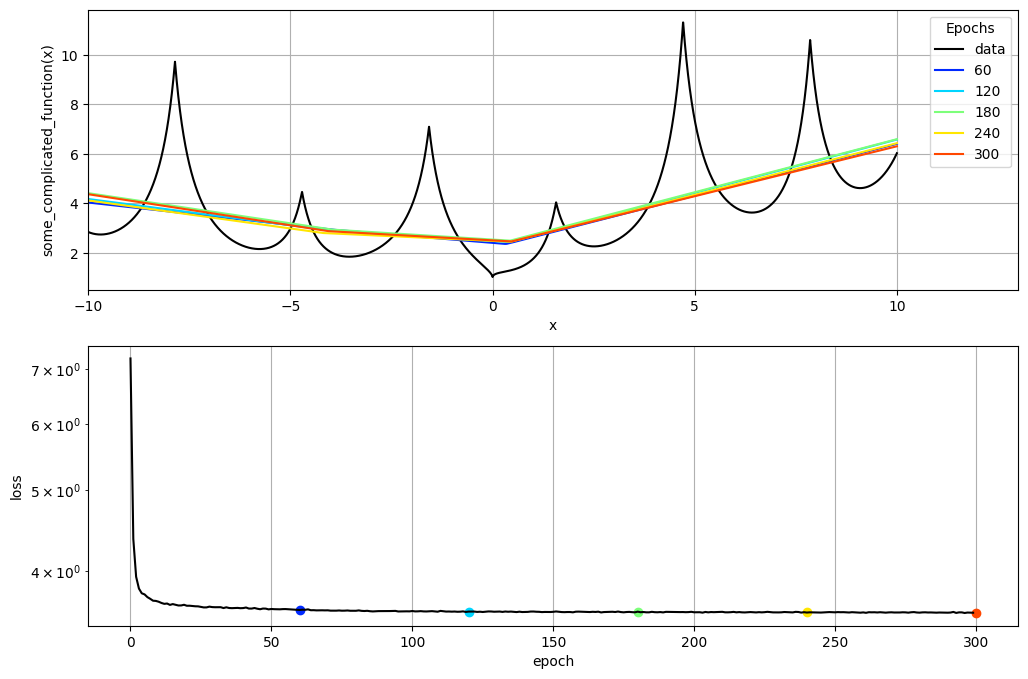

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model3.load_weights("weights-new2-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model3.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()